In [1]:
import utilities
import matplotlib.pyplot as plt
import numpy as np
import AdaBoost
import KernelPerceptron
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [2]:
height = width = 16
class_number = 10

In [3]:
train_data = 'Datasets/full_dataset.dat'

In [4]:
data,labels = utilities.read_data(train_data,width,height)

In [5]:
train_data = data
train_labels = labels
test_data = data
test_labels = labels
#train_data,test_data,train_labels,test_labels = utilities.data_split(data,labels,0.2)
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(9297, 256)
(9297, 256)
(9297,)
(9297,)


In [6]:
data_per_class_dictionary = utilities.collect_each_class_images(train_data,train_labels,10)
pair_datasets = utilities.create_1_VS_1_dataset(data_per_class_dictionary)
print("Paired classifiers number: " + str(len(pair_datasets)))

1553 images of class 0 found
1269 images of class 1 found
929 images of class 2 found
824 images of class 3 found
852 images of class 4 found
716 images of class 5 found
833 images of class 6 found
792 images of class 7 found
708 images of class 8 found
821 images of class 9 found
Paired classifiers number: 45


In [7]:
algorithm = 'AdaBoost'
parameters = [50]
#algorithm = 'KernelPerceptron'
#parameters = ['gaussian',0.5]
models_dict = utilities.one_VS_all_training(data_per_class_dictionary,class_number,algorithm,parameters)
#pair_models = utilities.one_vs_one_training(pair_datasets,algorithm,parameters)

Training a classifier for: 0
Training a classifier for: 1
Training a classifier for: 2
Training a classifier for: 3
Training a classifier for: 4
Training a classifier for: 5
Training a classifier for: 6
Training a classifier for: 7
Training a classifier for: 8
Training a classifier for: 9


In [8]:
test_predictions,test_confidence = utilities.one_VS_all_testing(models_dict,test_data,test_labels)
#test_predictions = utilities.one_vs_one_testing(pair_models,test_data,class_number)

In [9]:
hard_items_indexes = utilities.get_lowest_confidence_items(test_confidence)
print(hard_items_indexes)

[1880, 7709, 1400, 4274, 2341]


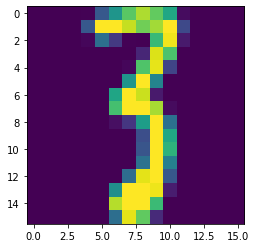

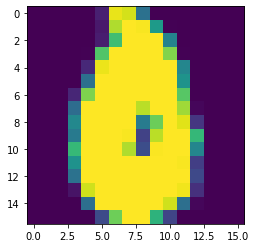

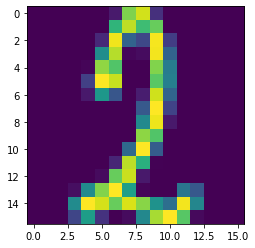

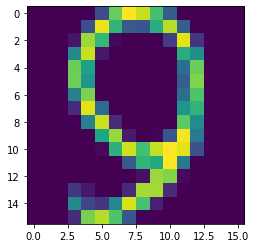

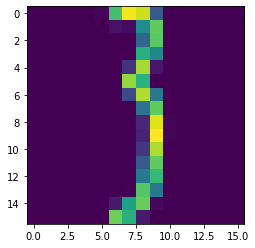

In [10]:
for index in hard_items_indexes:
    imgplot = plt.imshow(test_data[index].reshape((16,16)))
    plt.show()

In [11]:
print(utilities.calculate_accuracy(test_predictions,test_labels))

93.14832741744648


In [12]:
utilities.confusion_matrix(test_predictions,test_labels)

(0, 0) 0
(0, 1) 0
(0, 2) 8
(0, 3) 7
(0, 4) 3
(0, 5) 9
(0, 6) 10
(0, 7) 2
(0, 8) 16
(0, 9) 1
(1, 0) 1
(1, 1) 0
(1, 2) 2
(1, 3) 1
(1, 4) 10
(1, 5) 0
(1, 6) 2
(1, 7) 2
(1, 8) 3
(1, 9) 3
(2, 0) 2
(2, 1) 0
(2, 2) 0
(2, 3) 23
(2, 4) 23
(2, 5) 10
(2, 6) 11
(2, 7) 4
(2, 8) 9
(2, 9) 4
(3, 0) 4
(3, 1) 2
(3, 2) 15
(3, 3) 0
(3, 4) 0
(3, 5) 52
(3, 6) 0
(3, 7) 1
(3, 8) 15
(3, 9) 2
(4, 0) 8
(4, 1) 2
(4, 2) 28
(4, 3) 1
(4, 4) 0
(4, 5) 22
(4, 6) 8
(4, 7) 9
(4, 8) 8
(4, 9) 10
(5, 0) 5
(5, 1) 0
(5, 2) 6
(5, 3) 24
(5, 4) 1
(5, 5) 0
(5, 6) 8
(5, 7) 2
(5, 8) 6
(5, 9) 1
(6, 0) 4
(6, 1) 0
(6, 2) 3
(6, 3) 1
(6, 4) 17
(6, 5) 28
(6, 6) 0
(6, 7) 0
(6, 8) 3
(6, 9) 0
(7, 0) 1
(7, 1) 0
(7, 2) 12
(7, 3) 6
(7, 4) 4
(7, 5) 0
(7, 6) 0
(7, 7) 0
(7, 8) 4
(7, 9) 21
(8, 0) 0
(8, 1) 1
(8, 2) 18
(8, 3) 8
(8, 4) 5
(8, 5) 7
(8, 6) 5
(8, 7) 3
(8, 8) 0
(8, 9) 9
(9, 0) 1
(9, 1) 0
(9, 2) 1
(9, 3) 2
(9, 4) 30
(9, 5) 10
(9, 6) 0
(9, 7) 21
(9, 8) 6
(9, 9) 0
